In [1]:
import torch 

In [6]:
images = torch.tensor(torch.rand((256, 256)))

C:\Users\trikh\AppData\Local\Temp\ipykernel_21640\1333054954.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(torch.rand((256, 256)))


In [7]:
import matplotlib.pyplot as plt

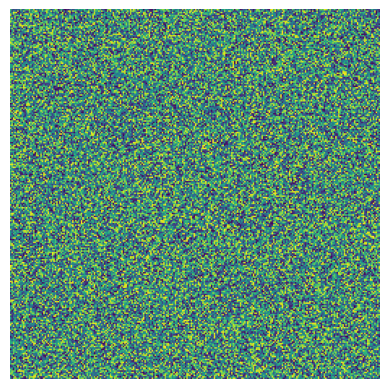

In [10]:
plt.imshow(images)
plt.axis('off');

In [ ]:
noise_image = torch.rand_like()